In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("customer_satisfaction_data.csv")
df.head()

,customer_id,quarter,survey_date,account_manager_responsive,billing_accuracy,budget_control,change_management,communication_clarity,competitive_pricing,cost_transparency,...,technical_expertise,timeline_adherence,training_quality,trust_reliability,value_for_money,overall_satisfaction,nps_score,renewal_likelihood,revenue_growth_pct,referrals_generated
0,CUST_001,Q1_2024,2024-03-22,5.0,6.0,4.0,5.0,4.0,5.0,5.0,...,4.0,4.0,2.0,6.0,6.0,4,6,4,12.3,1
1,CUST_002,Q1_2024,2024-03-20,5.0,3.0,4.0,5.0,5.0,3.0,3.0,...,4.0,4.0,4.0,4.0,4.0,4,5,3,17.8,0
2,CUST_003,Q1_2024,2024-03-17,4.0,3.0,4.0,3.0,4.0,4.0,3.0,...,4.0,4.0,3.0,4.0,3.0,3,4,3,-7.8,0
3,CUST_004,Q1_2024,2024-03-08,3.0,4.0,4.0,3.0,2.0,3.0,4.0,...,4.0,4.0,4.0,2.0,4.0,4,5,2,-13.4,0
4,CUST_005,Q1_2024,2024-03-12,5.0,5.0,5.0,4.0,5.0,4.0,3.0,...,6.0,5.0,4.0,5.0,4.0,5,5,4,3.7,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 3400 non-null   object 
 1   quarter                     3400 non-null   object 
 2   survey_date                 3400 non-null   object 
 3   account_manager_responsive  3384 non-null   float64
 4   billing_accuracy            3387 non-null   float64
 5   budget_control              3383 non-null   float64
 6   change_management           3388 non-null   float64
 7   communication_clarity       3384 non-null   float64
 8   competitive_pricing         3385 non-null   float64
 9   cost_transparency           3390 non-null   float64
 10  documentation_help          3386 non-null   float64
 11  executive_access            3390 non-null   float64
 12  innovation_solutions        3390 non-null   float64
 13  long_term_partnership       3386 

In [4]:
df.describe()
#print(df.isnull().sum())
print((df.isnull().mean()*100).round(2).sort_index(ascending=False))

value_for_money               0.44
trust_reliability             0.65
training_quality              0.50
timeline_adherence            0.24
technical_expertise           0.26
technical_documentation       0.56
system_integration            0.41
survey_date                   0.00
support_responsiveness        0.50
roi_demonstration             0.50
revenue_growth_pct            0.00
renewal_likelihood            0.00
referrals_generated           0.00
quarter                       0.00
quality_deliverables          0.38
project_management            0.50
problem_solving               0.59
overall_satisfaction          0.00
nps_score                     0.00
long_term_partnership         0.41
innovation_solutions          0.29
executive_access              0.29
documentation_help            0.41
customer_id                   0.00
cost_transparency             0.29
competitive_pricing           0.44
communication_clarity         0.47
change_management             0.35
budget_control      

Los valores nulos no pasan del 1%

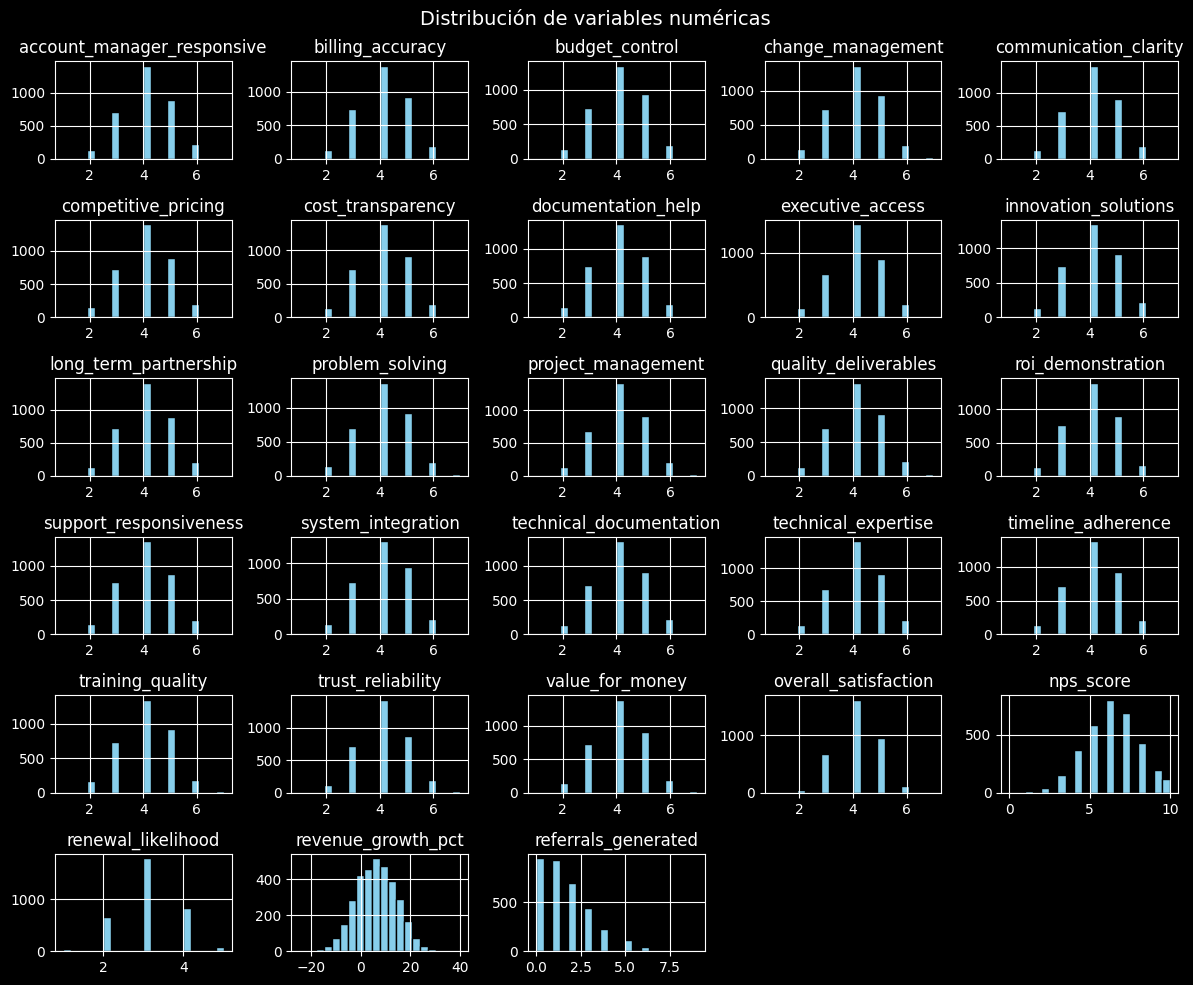

In [5]:
num_cols= df.select_dtypes(exclude=["object"]).columns 

df[num_cols].hist(figsize=(12,10), bins=20, color="skyblue", edgecolor="black")
plt.suptitle("Distribución de variables numéricas", fontsize=14)
plt.tight_layout()
plt.show()


In [6]:
df_fa = df[[
    "account_manager_responsive", "billing_accuracy", "budget_control", 
    "change_management", "communication_clarity", "competitive_pricing",
    "cost_transparency", "documentation_help", "executive_access",
    "innovation_solutions", "long_term_partnership", "problem_solving",
    "project_management", "quality_deliverables", "roi_demonstration",
    "support_responsiveness", "system_integration", "technical_documentation",
    "technical_expertise", "timeline_adherence", "training_quality",
    "trust_reliability", "value_for_money"
]].copy()
df_fa.fillna(df_fa.mean(), inplace=True)


In [7]:
df_fa.isnull().sum()

account_manager_responsive    0
billing_accuracy              0
budget_control                0
change_management             0
communication_clarity         0
competitive_pricing           0
cost_transparency             0
documentation_help            0
executive_access              0
innovation_solutions          0
long_term_partnership         0
problem_solving               0
project_management            0
quality_deliverables          0
roi_demonstration             0
support_responsiveness        0
system_integration            0
technical_documentation       0
technical_expertise           0
timeline_adherence            0
training_quality              0
trust_reliability             0
value_for_money               0
dtype: int64

In [8]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity,calculate_kmo 

kmo_all, kmo_model = calculate_kmo(df_fa)
print(f"KMO global: {kmo_model:.3f}")

chi_square_value, p_value = calculate_bartlett_sphericity(df_fa)
print(f"Bartlett’s test: Chi² = {chi_square_value:.2f}, p = {p_value:.5f}")

KMO global: 0.959
Bartlett’s test: Chi² = 34357.04, p = 0.00000


c:\Users\maulo\anaconda3\envs\IDMPY\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


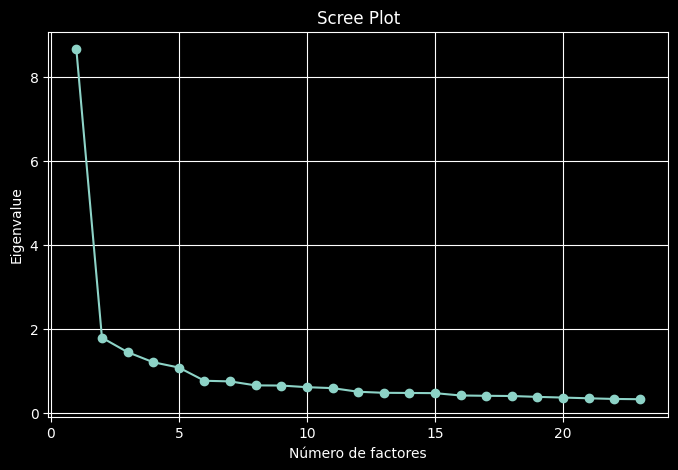

Factor 1: eigenvalue = 8.661
Factor 2: eigenvalue = 1.786
Factor 3: eigenvalue = 1.442
Factor 4: eigenvalue = 1.202
Factor 5: eigenvalue = 1.075
Factor 6: eigenvalue = 0.760
Factor 7: eigenvalue = 0.745
Factor 8: eigenvalue = 0.650
Factor 9: eigenvalue = 0.646
Factor 10: eigenvalue = 0.607
Factor 11: eigenvalue = 0.585
Factor 12: eigenvalue = 0.498
Factor 13: eigenvalue = 0.473
Factor 14: eigenvalue = 0.470
Factor 15: eigenvalue = 0.465
Factor 16: eigenvalue = 0.410
Factor 17: eigenvalue = 0.402
Factor 18: eigenvalue = 0.397
Factor 19: eigenvalue = 0.376
Factor 20: eigenvalue = 0.360
Factor 21: eigenvalue = 0.342
Factor 22: eigenvalue = 0.327
Factor 23: eigenvalue = 0.320


In [9]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(rotation=None)

fa.fit(df_fa)
eigen_values, vects = fa.get_eigenvalues()

plt.figure(figsize=(8,5))
plt.plot(range(1, df_fa.shape[1]+1), eigen_values, marker='o')
plt.title('Scree Plot')
plt.xlabel('Número de factores')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

for i, val in enumerate(eigen_values, start=1):
    print(f"Factor {i}: eigenvalue = {val:.3f}")

In [10]:
fa2 = FactorAnalyzer(n_factors=2, rotation='varimax')
fa2.fit(df_fa)

fa2p = FactorAnalyzer(n_factors=2, rotation='promax')
fa2p.fit(df_fa)

fa3 = FactorAnalyzer(n_factors=3, rotation='varimax')
fa3.fit(df_fa)

fa3p = FactorAnalyzer(n_factors=3, rotation='promax')
fa3p.fit(df_fa)


c:\Users\maulo\anaconda3\envs\IDMPY\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\maulo\anaconda3\envs\IDMPY\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\maulo\anaconda3\envs\IDMPY\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\maulo\anaconda3\envs\IDMPY\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,n_factors,3
,rotation,'promax'
,method,'minres'
,use_smc,True
,is_corr_matrix,False
,bounds,"(0.005, ...)"
,impute,'median'
,svd_method,'randomized'
,rotation_kwargs,{}


In [11]:
loadings2 = pd.DataFrame(fa2.loadings_, index=df_fa.columns)
print(loadings2)
loadings3 = pd.DataFrame(fa3.loadings_, index=df_fa.columns)
print(loadings3)


                                   0         1
account_manager_responsive  0.503471  0.338894
billing_accuracy            0.139378  0.583287
budget_control              0.538307  0.453609
change_management           0.529079  0.449642
communication_clarity       0.508471  0.350461
competitive_pricing         0.147234  0.549225
cost_transparency           0.157168  0.554122
documentation_help          0.281833  0.187596
executive_access            0.500501  0.345101
innovation_solutions        0.771559  0.127258
long_term_partnership       0.500904  0.324789
problem_solving             0.763700  0.137706
project_management          0.522224  0.469378
quality_deliverables        0.531821  0.450743
roi_demonstration           0.151906  0.549642
support_responsiveness      0.301099  0.202179
system_integration          0.772188  0.143509
technical_documentation     0.763414  0.144308
technical_expertise         0.752422  0.154783
timeline_adherence          0.535435  0.451946
training_qual

In [12]:
loadings2p = pd.DataFrame(fa2p.loadings_, index = df_fa.columns)
print(loadings2p)
loadings3p = pd.DataFrame(fa3p.loadings_, index = df_fa.columns)
print(loadings3p)

                                   0         1
account_manager_responsive  0.473354  0.175054
billing_accuracy           -0.114954  0.672656
budget_control              0.460238  0.303553
change_management           0.450435  0.303207
communication_clarity       0.473933  0.187251
competitive_pricing        -0.087790  0.625206
cost_transparency          -0.077552  0.626378
documentation_help          0.266035  0.095300
executive_access            0.466437  0.184486
innovation_solutions        0.922459 -0.231745
long_term_partnership       0.477161  0.158377
problem_solving             0.907160 -0.214408
project_management          0.431751  0.331876
quality_deliverables        0.453386  0.303210
roi_demonstration          -0.082027  0.623352
support_responsiveness      0.283336  0.104058
system_integration          0.915096 -0.211343
technical_documentation     0.903477 -0.205843
technical_expertise         0.884159 -0.186872
timeline_adherence          0.457403  0.302899
training_qual

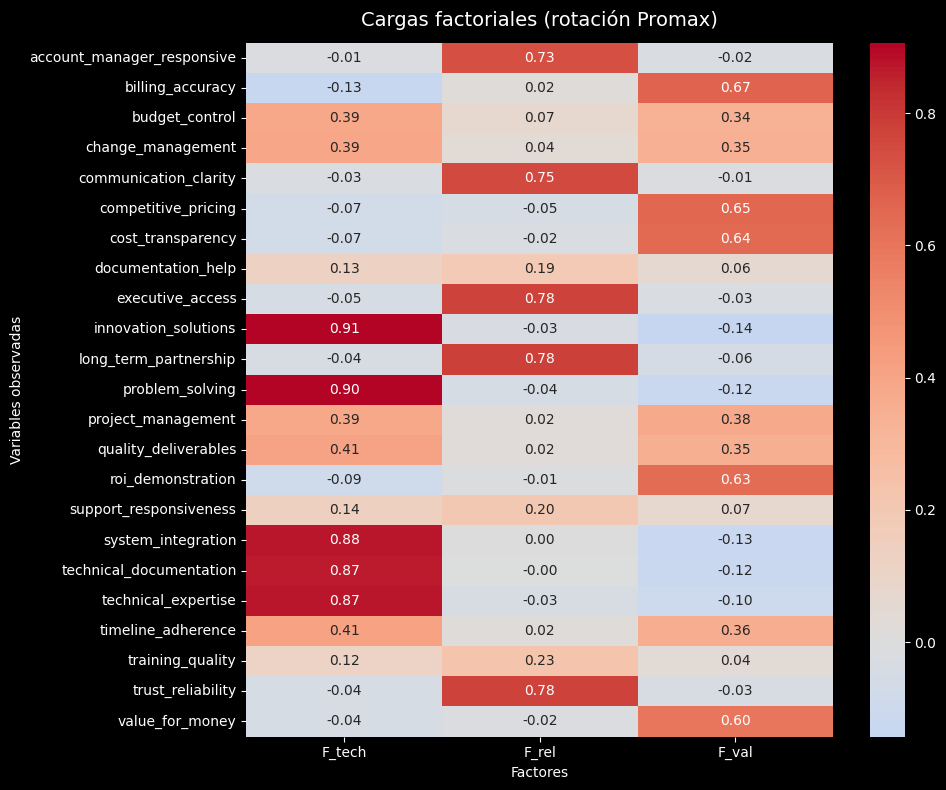

In [13]:
loadings = pd.DataFrame(fa3p.loadings_, 
                        index=df_fa.columns, 
                        columns=["F_tech", "F_rel", "F_val"])

plt.figure(figsize=(10, 8))
sns.heatmap(loadings, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Cargas factoriales (rotación Promax)", fontsize=14, pad=12)
plt.xlabel("Factores")
plt.ylabel("Variables observadas")
plt.tight_layout()
plt.show()


Se logro explciar un 46% de la varianza total

In [14]:
fa3p.get_factor_variance()  


(array([4.80003526, 3.06932007, 2.77344847]),
 array([0.20869719, 0.1334487 , 0.12058472]),
 array([0.20869719, 0.34214588, 0.4627306 ]))

Los tres factores identificados muestran correlaciones positivas altas (r = 0.72–0.80), lo que sugiere que la experiencia del cliente es multidimensional pero interdependiente: la percepción técnica, la calidad de la relación y el valor comercial se refuerzan entre sí.

In [15]:

scores = fa3p.transform(df_fa)  # (n_muestras, n_factores)
scores_df = pd.DataFrame(scores, columns=["F_tech","F_rel","F_val"])
scores_corr = scores_df.corr()  # correlación empírica entre factores
print(scores_corr.round(3))


        F_tech  F_rel  F_val
F_tech   1.000  0.798  0.721
F_rel    0.798  1.000  0.727
F_val    0.721  0.727  1.000


c:\Users\maulo\anaconda3\envs\IDMPY\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


# Ver si hay correlacion en variables latentes y reales

c:\Users\maulo\anaconda3\envs\IDMPY\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


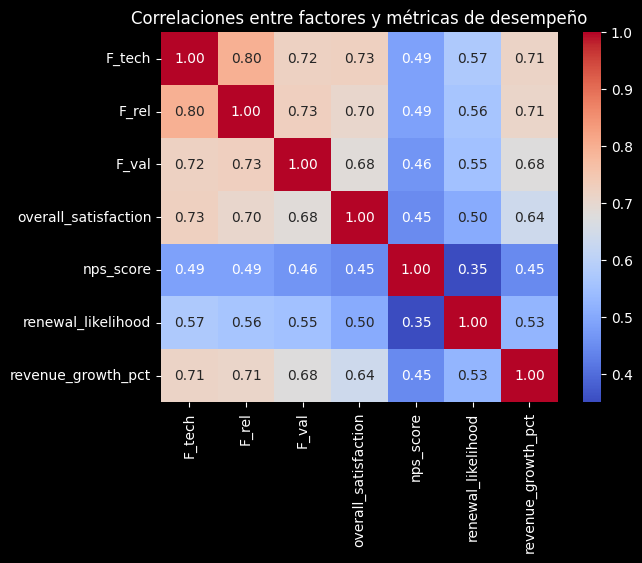

In [16]:
scores = fa3p.transform(df_fa)
scores_df = pd.DataFrame(scores, columns=["F_tech","F_rel","F_val"])

valid_df = pd.concat([
    scores_df,
    df[["overall_satisfaction","nps_score","renewal_likelihood","revenue_growth_pct"]].reset_index(drop=True)
], axis=1)

corr = valid_df.corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlaciones entre factores y métricas de desempeño")
plt.show()

Los tres factores latentes identificados presentan correlaciones fuertes entre sí (r = 0.7–0.8), lo que confirma que la satisfacción del cliente es un fenómeno multidimensional pero interdependiente.

En relación con las métricas globales, el factor técnico muestra la asociación más alta con la satisfacción general (r = 0.73) y el crecimiento de ingresos (r = 0.71), mientras que el factor relacional mantiene una influencia estable sobre la probabilidad de renovación (r = 0.56) y el NPS (r = 0.49).

Estos resultados sugieren que la excelencia técnica impulsa la percepción de valor y el rendimiento comercial, mientras que la calidad de la relación contribuye a la lealtad y recomendación de los clientes.

In [17]:
corr = valid_df.corr().round(2)
corr.loc[["F_tech","F_rel","F_val"],
         ["overall_satisfaction","nps_score","renewal_likelihood","revenue_growth_pct"]]


,overall_satisfaction,nps_score,renewal_likelihood,revenue_growth_pct
F_tech,0.73,0.49,0.57,0.71
F_rel,0.70,0.49,0.56,0.71
F_val,0.68,0.46,0.55,0.68


## Resultado de Modelo

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [19]:
modelo = LinearRegression()


X = valid_df[["F_tech","F_rel","F_val"]]
y = valid_df["overall_satisfaction"]
modelo.fit(X,y)

y_predict= modelo.predict(X)

print("R²:", r2_score(y, y_predict))
print("Coeficientes:", modelo.coef_)
print("Intercepto:", modelo.intercept_)

R²: 0.5977399747748853
Coeficientes: [0.29624026 0.2049745  0.2328987 ]
Intercepto: 4.125588235294118


C:\Users\maulo\AppData\Local\Temp\ipykernel_64128\3160741951.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefs.index, y=coefs.values, palette="viridis")


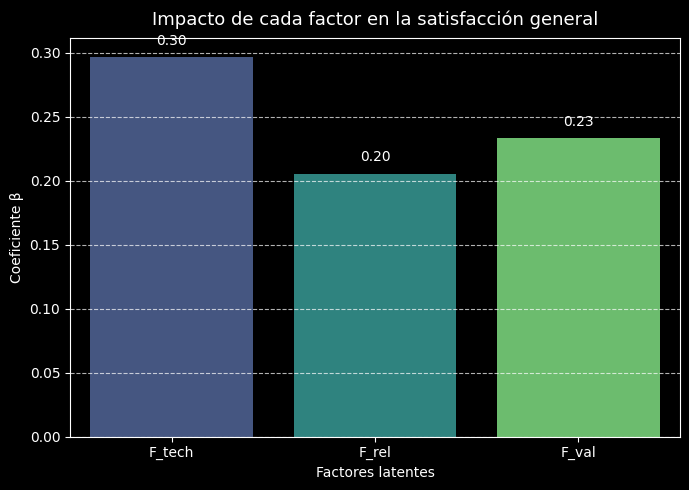

In [20]:
coefs = pd.Series(modelo.coef_, index=["F_tech", "F_rel", "F_val"])

plt.figure(figsize=(7,5))
sns.barplot(x=coefs.index, y=coefs.values, palette="viridis")
plt.title("Impacto de cada factor en la satisfacción general", fontsize=13, pad=10)
plt.ylabel("Coeficiente β")
plt.xlabel("Factores latentes")
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(coefs):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=10)
plt.tight_layout()
plt.show()

## Team Information

**Team:** 4

**Members:**
- Gerardo Javier López García (A01660262) - Data exploration and factor extraction
- Emilio Guillen Ramírez (A01029858) - Factor interpretation and business insights
- Mauricio Loera Abundis (A01659048) - Visualization and recommendations

**Deliverable Links:**
- **Presentation Video:** [https://drive.google.com/file/d/1WScro2RTkFiEqDBprh3d_0mh4qjRKItN/view?usp=sharing]
- **Executive Summary:** [Available on Canvas]
- **Dataset:** `customer_satisfaction_data.csv`

**Completion Date:** [02/11/2025]